# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [71]:
# import libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

import matplotlib.pyplot as plt

In [2]:
# load messages dataset
messages = pd.read_csv('disaster_messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# Code to view the classes of genres in the dataset
messages.genre.unique()

array(['direct', 'social', 'news'], dtype=object)

In [4]:
# View columns datatypes and nullcounts
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  int64 
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: int64(1), object(3)
memory usage: 820.4+ KB


In [5]:
#Code to print some statistics about the messages dataset.
messages.describe()

,id
count,26248.000000
mean,15224.078368
std,8826.069156
min,2.000000
25%,7445.750000
50%,15660.500000
75%,22923.250000
max,30265.000000


In [6]:
# load categories dataset
categories = pd.read_csv('disaster_categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [7]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26248 non-null  int64 
 1   categories  26248 non-null  object
dtypes: int64(1), object(1)
memory usage: 410.2+ KB


In [8]:
categories.describe()

,id
count,26248.000000
mean,15224.078368
std,8826.069156
min,2.000000
25%,7445.750000
50%,15660.500000
75%,22923.250000
max,30265.000000


Noticed that both datasets have the same number of rows.

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [9]:
# merge datasets
df = pd.merge(messages, categories, how="inner", on=["id"])
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26386 non-null  int64 
 1   message     26386 non-null  object
 2   original    10246 non-null  object
 3   genre       26386 non-null  object
 4   categories  26386 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


number of rows consistent with expectation of 26386.

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [11]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(pat = ';', expand = True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [12]:
row = categories.iloc[0]
row

0                    related-1
1                    request-0
2                      offer-0
3                aid_related-0
4               medical_help-0
5           medical_products-0
6          search_and_rescue-0
7                   security-0
8                   military-0
9                child_alone-0
10                     water-0
11                      food-0
12                   shelter-0
13                  clothing-0
14                     money-0
15            missing_people-0
16                  refugees-0
17                     death-0
18                 other_aid-0
19    infrastructure_related-0
20                 transport-0
21                 buildings-0
22               electricity-0
23                     tools-0
24                 hospitals-0
25                     shops-0
26               aid_centers-0
27      other_infrastructure-0
28           weather_related-0
29                    floods-0
30                     storm-0
31                      fire-0
32      

In [13]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = list(row.apply(lambda x: x.split('-')[0]))
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [14]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [15]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].astype(str).str[-1:]
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [16]:
# drop the original categories column from `df`

df.drop('categories', axis = 1, inplace = True)
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [17]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], join = 'inner', axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [18]:
# check number of duplicates
print('Number of duplicates in raw dataset: {}'.format(df.duplicated().sum()))

Number of duplicates in raw dataset: 170


In [19]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [20]:
# check number of duplicates
print('Number of duplicates in dataset after drop operation: {}'.format(df.duplicated().sum()))

Number of duplicates in dataset after drop operation: 0


### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [25]:
database_name = 'disaster_response.db'
table_name = 'disaster_response_tbl'

engine = create_engine('sqlite:///' + database_name)
df.to_sql(table_name, engine, index=False, if_exists = 'replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

#### Code cells below for testing data manipulation required to create plotly graphs

In [63]:
category_names = df.iloc[:,4:].columns
category_boolean = (df.iloc[:,4:] != 0).sum().values

In [64]:
total_category= np.sum(category_boolean)

In [65]:
category_boolean = (category_boolean/total_category) * 100

In [66]:
sum_dict = dict(zip(category_names, category_boolean))

In [74]:
sorted_values = sorted(sum_dict.values()) # Sort the values
sorted_sum_dict = {}

for i in sorted_values:
    for k in sum_dict.keys():
        if sum_dict[k] == i:
            sorted_sum_dict[k] = sum_dict[k]
            break

print(sorted_sum_dict)

{'child_alone': 0.0, 'offer': 0.14193781199254224, 'shops': 0.1443435376195345, 'tools': 0.1912551873458832, 'fire': 0.33920731340590604, 'hospitals': 0.34041017621940217, 'missing_people': 0.35845311842184396, 'aid_centers': 0.3716846093703013, 'clothing': 0.4871594394659289, 'security': 0.5665483851566728, 'cold': 0.637517291152944, 'electricity': 0.6399230167799362, 'money': 0.726529139351657, 'search_and_rescue': 0.8708726769711914, 'military': 1.0344620196066638, 'refugees': 1.0525049618091058, 'other_infrastructure': 1.384495098334035, 'death': 1.4362181993143681, 'transport': 1.444638239008841, 'medical_products': 1.5793588741204063, 'buildings': 1.603416130390329, 'other_weather': 1.655139231370662, 'water': 2.011186624165514, 'infrastructure_related': 2.050881097010886, 'medical_help': 2.5067661033259157, 'floods': 2.5921693630841403, 'shelter': 2.7834245504300235, 'storm': 2.9385938533710227, 'earthquake': 2.9530282071329768, 'food': 3.515968003849161, 'other_aid': 4.14506525

In [75]:
category_names = list(sorted_sum_dict.keys())
print(category_names)

['child_alone', 'offer', 'shops', 'tools', 'fire', 'hospitals', 'missing_people', 'aid_centers', 'clothing', 'security', 'cold', 'electricity', 'money', 'search_and_rescue', 'military', 'refugees', 'other_infrastructure', 'death', 'transport', 'medical_products', 'buildings', 'other_weather', 'water', 'infrastructure_related', 'medical_help', 'floods', 'shelter', 'storm', 'earthquake', 'food', 'other_aid', 'request', 'direct_report', 'weather_related', 'aid_related', 'related']


In [76]:
category_boolean = list(sorted_sum_dict.values())
print(category_boolean)

[0.0, 0.14193781199254224, 0.1443435376195345, 0.1912551873458832, 0.33920731340590604, 0.34041017621940217, 0.35845311842184396, 0.3716846093703013, 0.4871594394659289, 0.5665483851566728, 0.637517291152944, 0.6399230167799362, 0.726529139351657, 0.8708726769711914, 1.0344620196066638, 1.0525049618091058, 1.384495098334035, 1.4362181993143681, 1.444638239008841, 1.5793588741204063, 1.603416130390329, 1.655139231370662, 2.011186624165514, 2.050881097010886, 2.5067661033259157, 2.5921693630841403, 2.7834245504300235, 2.9385938533710227, 2.9530282071329768, 3.515968003849161, 4.145065255307632, 5.381608227581644, 6.104528778492813, 8.777289950081194, 13.063090154567872, 24.170325374391048]


(0.0, 50.0)

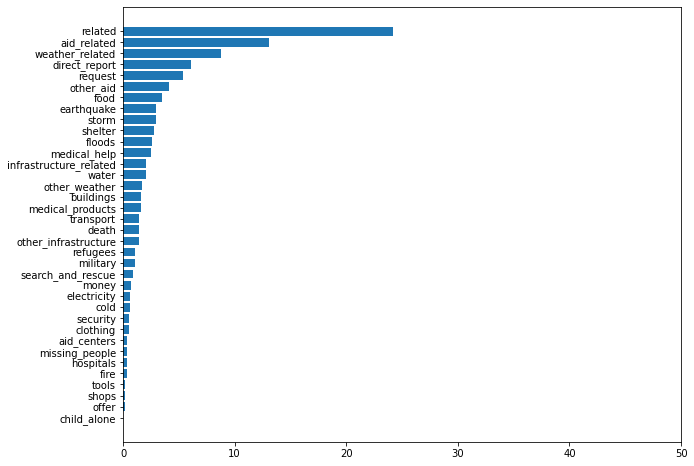

In [82]:
fig = plt.figure(figsize=(10, 8))
plt.barh(category_names, category_boolean)
plt.xlim(0,50)

In [84]:
df.head(2)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [114]:
list_val_vars=list(df.columns)[4:]
print(list_val_vars)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [128]:
df_melted = pd.melt(df, id_vars=["genre"], value_vars=list_val_vars).reset_index()
print(df_melted)

         index   genre       variable  value
0            0  direct        related      1
1            1  direct        related      1
2            2  direct        related      1
3            3  direct        related      1
4            4  direct        related      1
...        ...     ...            ...    ...
943771  943771    news  direct_report      0
943772  943772    news  direct_report      0
943773  943773    news  direct_report      0
943774  943774    news  direct_report      0
943775  943775    news  direct_report      0

[943776 rows x 4 columns]


In [129]:
df_melted = df_melted.groupby(['variable','genre'])['value'].sum().reset_index()
df_melted

,variable,genre,value
0,aid_centers,direct,78
1,aid_centers,news,218
2,aid_centers,social,13
3,aid_related,direct,4338
4,aid_related,news,5860
...,...,...,...
103,water,news,790
104,water,social,46
105,weather_related,direct,1521
106,weather_related,news,4280


In [130]:
df_melted_wsorter = df_melted.groupby('variable')['value'].sum().reset_index()
df_melted_wsorter.rename(columns = {'value': 'sorter'}, inplace = True)
df_melted_wsorter


,variable,sorter
0,aid_centers,309
1,aid_related,10860
2,buildings,1333
3,child_alone,0
4,clothing,405
5,cold,530
6,death,1194
7,direct_report,5075
8,earthquake,2455
9,electricity,532


In [131]:
df_melted = pd.merge(df_melted, df_melted_wsorter, on='variable' ).sort_values('sorter', ascending = False)


In [132]:
df_melted

,variable,genre,value,sorter
77,related,social,2129,20282
75,related,direct,7446,20282
76,related,news,10707,20282
3,aid_related,direct,4338,10860
4,aid_related,news,5860,10860
...,...,...,...,...
60,offer,direct,46,118
62,offer,social,7,118
11,child_alone,social,0,0
10,child_alone,news,0,0
